
Video Analytics

Basketball Match Video Analytics System Real-time Player Tracking & Game Event Detection

Project Overview:

1. Automatically detect players and the basketball in match footage

2. Track player movement and ball possession in real time

3. Identify shot attempts near the basket area

4. Generate live game statistics for performance analysis

5. Analyze player activity and match dynamics using computer

Technologies Used:

YOLOv8 for object detection
OpenCV for video processing
Background subtraction for abandoned object detection
Real-time alert system

In [1]:
!pip install opencv-python ultralytics numpy lap

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


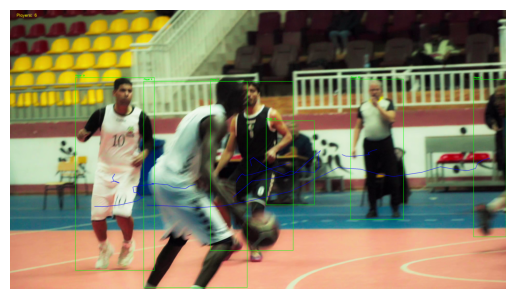


0: 384x640 4 persons, 3 chairs, 86.7ms
Speed: 5.0ms preprocess, 86.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


In [ ]:
# ===============================
# IMPORT LIBRARIES
# ===============================
import cv2
import numpy as np
from ultralytics import YOLO
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# ===============================
# LOAD MODEL
# ===============================
model = YOLO("yolov8n.pt")

# ===============================
# LOAD VIDEO
# ===============================
video_path = "sports.mp4"   # <-- CHANGE to your sports video
cap = cv2.VideoCapture(video_path)

# PERSON CLASS (players)
PERSON_CLASS = 0

# Store player paths
paths = {}

print("Sports analytics running...")

# ===============================
# MAIN LOOP
# ===============================
while cap.isOpened():

    ret, frame = cap.read()

    if not ret:
        break

    # Track players
    results = model.track(frame, persist=True, conf=0.3)

    player_count = 0

    if results[0].boxes is not None and results[0].boxes.id is not None:

        boxes = results[0].boxes.xyxy.cpu().numpy()
        ids = results[0].boxes.id.cpu().numpy()
        classes = results[0].boxes.cls.cpu().numpy()

        for box, track_id, cls in zip(boxes, ids, classes):

            # Only detect players (person class)
            if int(cls) != PERSON_CLASS:
                continue

            player_count += 1

            x1,y1,x2,y2 = map(int,box)

            cx = int((x1+x2)/2)
            cy = int((y1+y2)/2)

            # Save movement path
            if track_id not in paths:
                paths[track_id] = []

            paths[track_id].append((cx,cy))

            # Draw player box
            cv2.rectangle(frame,(x1,y1),(x2,y2),(0,255,0),2)

            cv2.putText(frame,
                        f"Player {int(track_id)}",
                        (x1,y1-10),
                        cv2.FONT_HERSHEY_SIMPLEX,
                        0.5,(0,255,0),2)

            # Draw movement trail
            for i in range(1,len(paths[track_id])):
                cv2.line(frame,
                         paths[track_id][i-1],
                         paths[track_id][i],
                         (255,0,0),2)

    # Display player count
    cv2.putText(frame,
                f"Players: {player_count}",
                (50,50),
                cv2.FONT_HERSHEY_SIMPLEX,
                1,(0,255,255),2)

    # ===============================
    # SHOW VIDEO IN JUPYTER
    # ===============================
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    clear_output(wait=True)
    plt.imshow(frame_rgb)
    plt.axis("off")
    display(plt.gcf())

cap.release()

print("Sports analytics finished!")